In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
MAIN_DIR = os.path.abspath(os.path.join(os.getcwd(),'..'))
DATA_DIR = os.path.join(MAIN_DIR,'data')

In [4]:
# Read files to dictionary

data_path = DATA_DIR
n_files = 60
data_dict = {}
for i in range(n_files):
    print(f"reading file {i+1}/{n_files}...\r", end="")
    file_name = f"{i+1:02d}_tracks.csv"
    file_path = os.path.join(data_path, file_name)
    data_dict[f"data_{i+1}"] = pd.read_csv(file_path)

In [5]:
for i in range(n_files):
    data_dict[f"data_{i+1}"]["DRAC"] = (data_dict[f"data_{i+1}"]["precedingXVelocity"] - data_dict[f"data_{i+1}"]["xVelocity"])**2/(data_dict[f"data_{i+1}"]["dhw"])
    data_dict[f"data_{i+1}"]["DRAC"].replace([np.inf, -np.inf], np.nan, inplace=True)

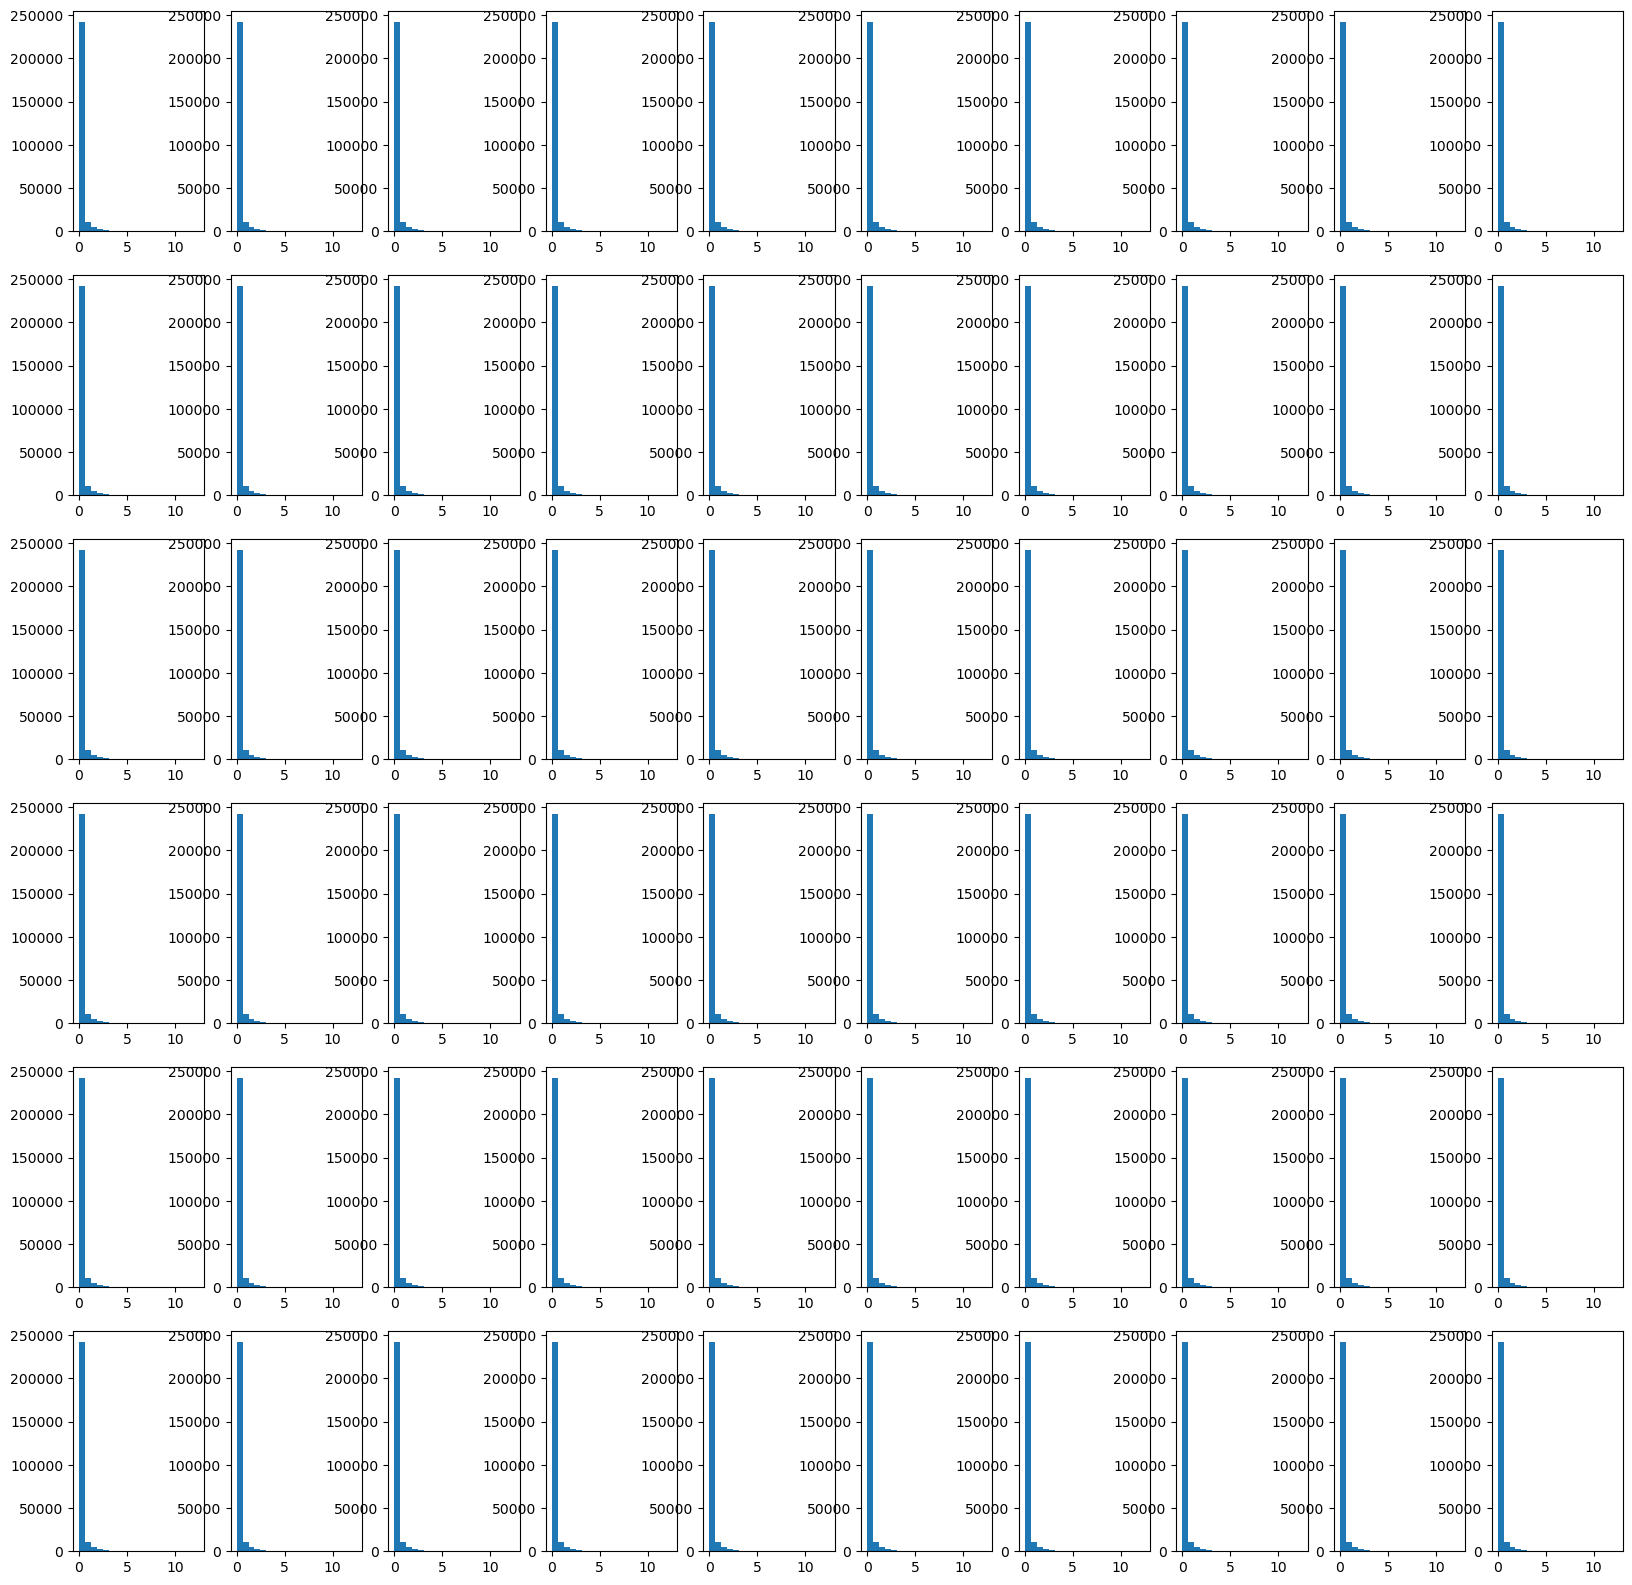

In [6]:
plt.figure(1, figsize=(20,20))
for i in range(n_files):
    plt.subplot(6,10,i+1)
    plt.hist(data_dict['data_1']["DRAC"],bins=20);

In [7]:
maxlen = 0
for i in range(n_files):
    length = len(data_dict[f'data_{i+1}']["DRAC"])
    if length > maxlen:
        maxlen = length
maxlen

2019752

In [8]:
dfDRAC = pd.DataFrame(np.zeros(shape=(maxlen,n_files)))
for i in range(n_files):
    dfDRAC[i] = data_dict[f'data_{i+1}']['DRAC']

(-1.0, 60.0)

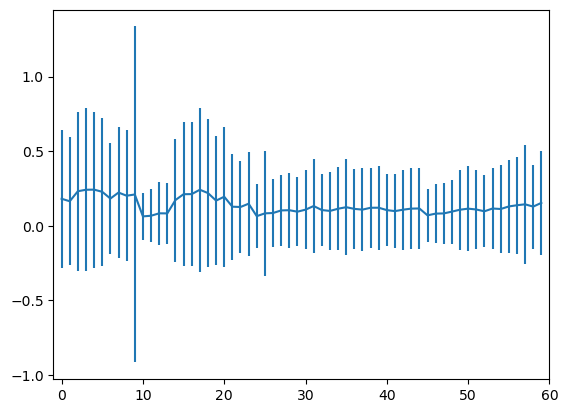

In [9]:
plt.errorbar(range(n_files),dfDRAC.mean(),dfDRAC.std())
plt.xlim(-1,60)

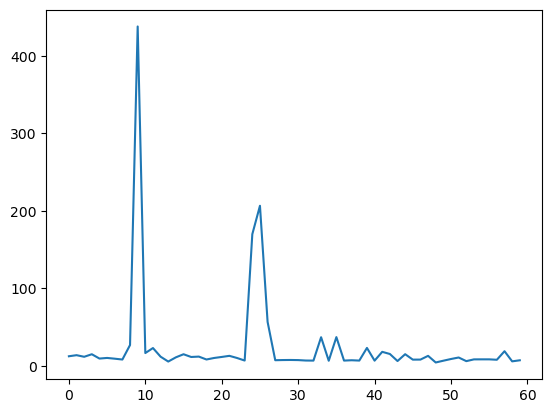

In [10]:
plt.plot(dfDRAC.max())

In [11]:
pd.DataFrame(dfDRAC[dfDRAC>7.5].count())

,0
0,26
1,16
2,44
3,162
4,17
5,32
6,5
7,11
8,24
9,1


In [12]:
dfDRAC.loc[(dfDRAC[9]>7.5)]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
69809,0.01582,0.454046,0.026262,NaN,NaN,0.59168,0.045944,1.493919,NaN,437.900192,...,0.038369,0.610031,0.018689,0.461564,0.022081,NaN,0.006555,0.222189,NaN,0.017513


In [13]:
data_dict['data_10'].loc[69809]

frame                 4066.000000
id                     227.000000
x                       18.710000
y                        6.130000
width                   19.000000
height                   2.500000
xVelocity              -25.100000
yVelocity                0.870000
xAcceleration            0.050000
yAcceleration            0.160000
frontSightDistance      23.450000
backSightDistance      387.320000
dhw                      0.520000
thw                      0.020000
ttc                     -0.030000
precedingXVelocity     -40.190000
precedingId            237.000000
followingId            238.000000
leftPrecedingId          0.000000
leftAlongsideId          0.000000
leftFollowingId        245.000000
rightPrecedingId         0.000000
rightAlongsideId         0.000000
rightFollowingId       229.000000
laneId                   3.000000
DRAC                   437.900192
Name: 69809, dtype: float64

In [14]:
DRACSTATS = pd.DataFrame([dfDRAC.mean().to_numpy(), dfDRAC.std().to_numpy(), dfDRAC.skew().to_numpy(), dfDRAC.kurtosis().to_numpy(),dfDRAC.min().to_numpy(),dfDRAC.max().to_numpy(),dfDRAC.median().to_numpy()],["Mean","STD","Skewness","Kurtosis","Min","Max","Median"]).transpose()
DRACSTATS

,Mean,STD,Skewness,Kurtosis,Min,Max,Median
0,0.181248,0.462604,5.708922,51.324357,0.0,12.447906,0.024053
1,0.164621,0.427761,5.897897,65.219407,0.0,13.835298,0.017276
2,0.231643,0.534137,5.029124,40.504837,0.0,11.774028,0.027851
3,0.241727,0.547626,6.873076,85.027098,0.0,15.049140,0.043535
4,0.242480,0.523538,4.660533,32.064656,0.0,9.483264,0.043792
5,0.227766,0.494618,4.864950,37.860550,0.0,10.278525,0.039193
6,0.182630,0.373333,4.615672,37.231294,0.0,9.309505,0.034716
7,0.222904,0.437678,4.487505,33.135209,0.0,8.227351,0.049279
8,0.201615,0.437399,7.648902,192.128161,0.0,26.915567,0.042069
9,0.209995,1.126336,332.730778,129204.406850,0.0,437.900192,0.040149


In [15]:
df1 = dfDRAC.apply(lambda x: pd.Series(x.dropna().values)).fillna('')

In [16]:
df1 = df1.truncate(after = df1.last_valid_index())

c:\Users\20192707\Anaconda3\envs\exbase\lib\site-packages\matplotlib\axes\_axes.py:6709: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\20192707\Anaconda3\envs\exbase\lib\site-packages\matplotlib\axes\_axes.py:6710: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


NAN slice found in dataset 26 and in lane 5
NAN slice found in dataset 59 and in lane 2


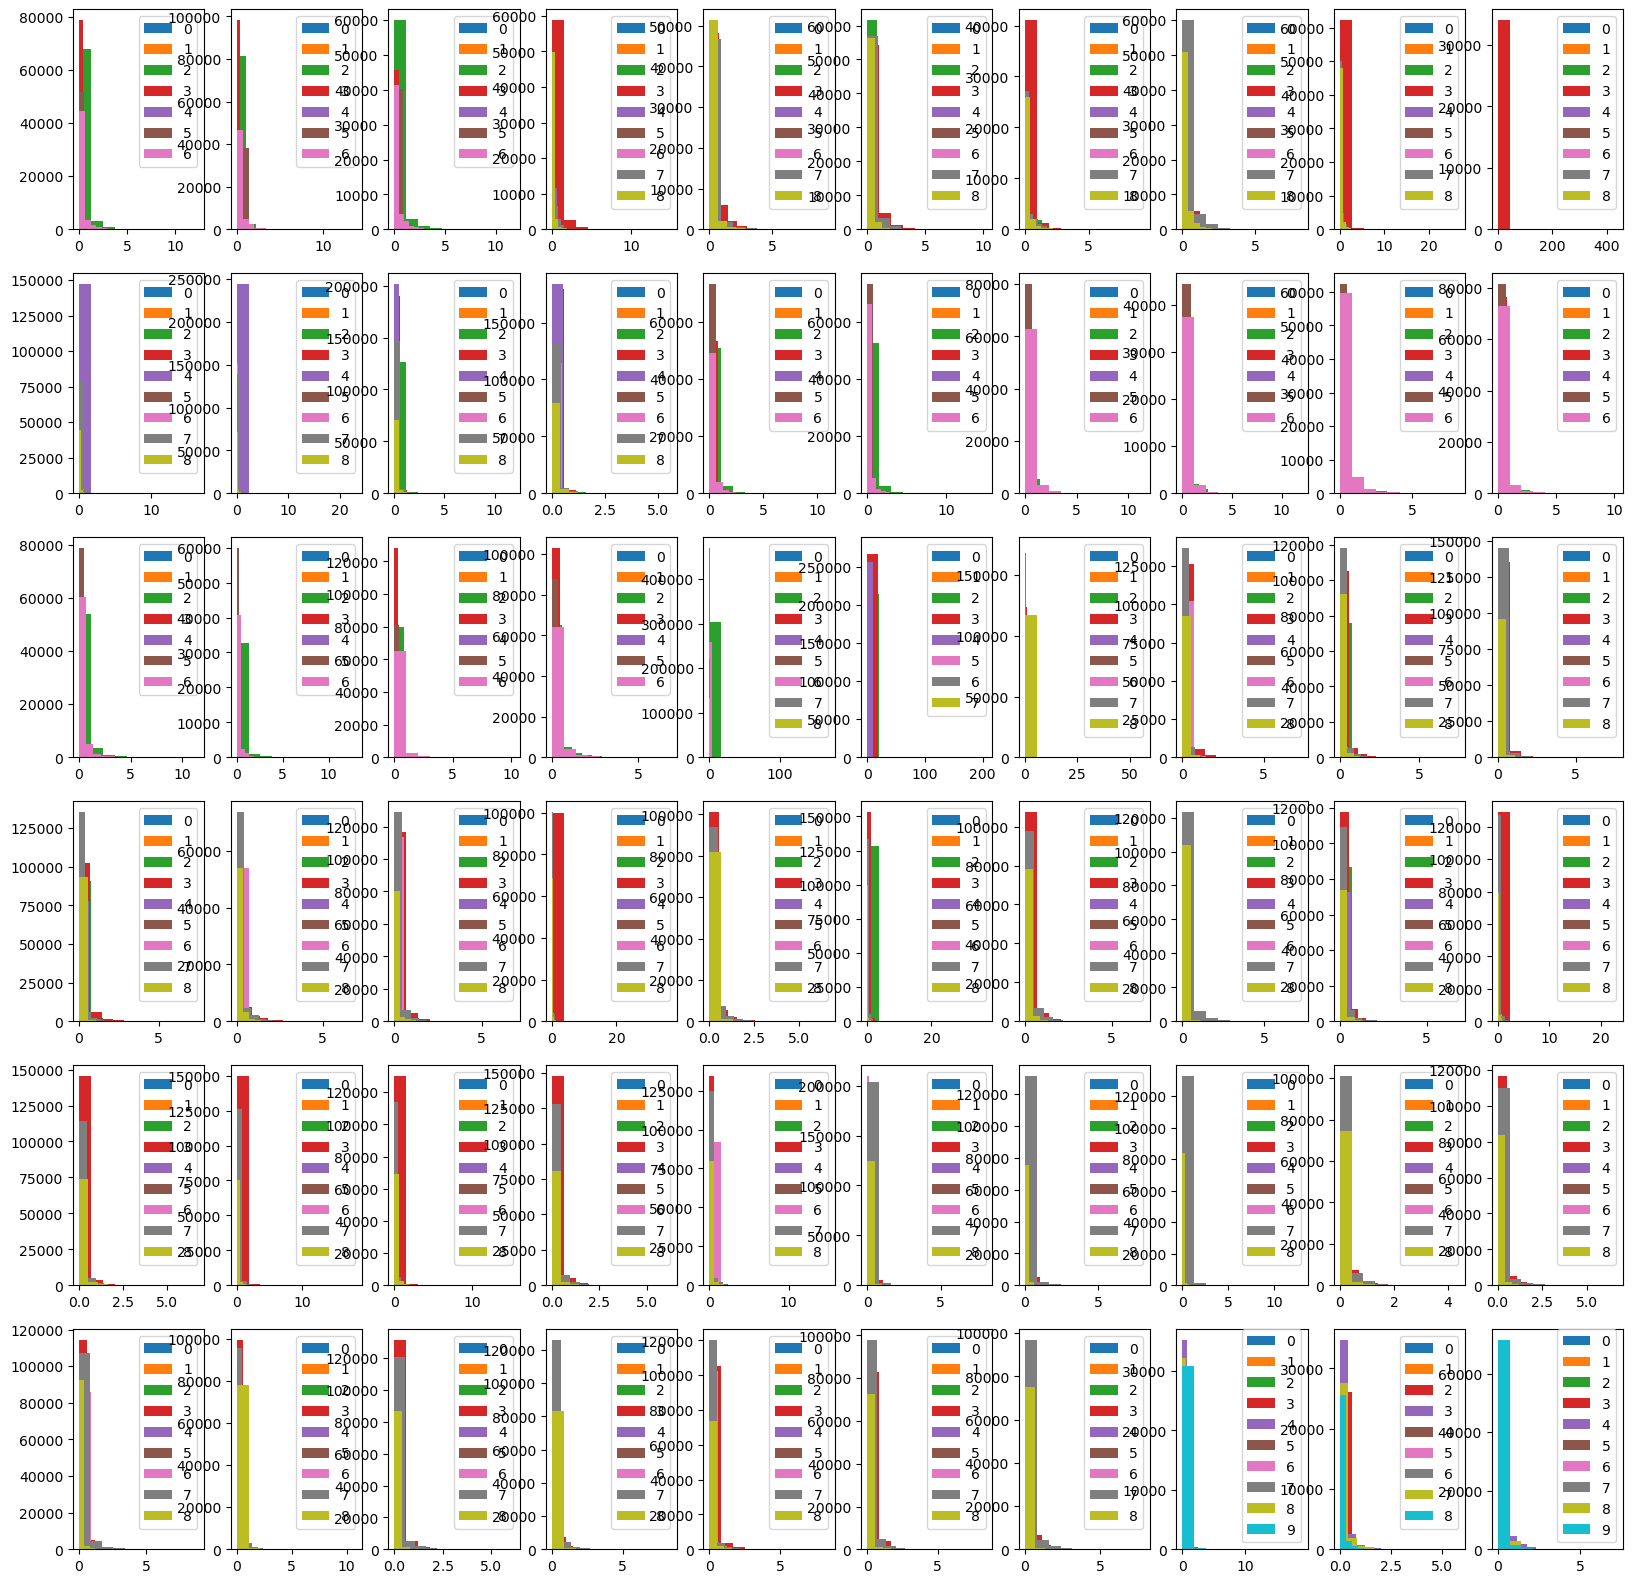

In [17]:
plt.figure(1, figsize=(20,20))
for i in range(n_files):
    plt.subplot(6,10,i+1)
    for j in range(data_dict[f'data_{i+1}'].laneId.max()+1):
        try:
            plt.hist(data_dict[f'data_{i+1}'][data_dict[f'data_{i+1}'].laneId==j]['DRAC'])
            plt.legend(range(data_dict[f'data_{i+1}'].laneId.max()+1))
        except:
            print(f"NAN slice found in dataset {i+1} and in lane {j}")



In [43]:
maxT = 0
for i in range(n_files):
    max = data_dict[f'data_{i+1}'].laneId.max()
    print(i+1,max)

1 6
2 6
3 6
4 8
5 8
6 8
7 8
8 8
9 8
10 8
11 8
12 8
13 8
14 8
15 6
16 6
17 6
18 6
19 6
20 6
21 6
22 6
23 6
24 6
25 8
26 8
27 8
28 8
29 8
30 8
31 8
32 8
33 8
34 8
35 8
36 8
37 8
38 8
39 8
40 8
41 8
42 8
43 8
44 8
45 8
46 8
47 8
48 8
49 8
50 8
51 8
52 8
53 8
54 8
55 8
56 8
57 8
58 9
59 9
60 9


In [ ]:
def DRAC_counts(data:pd.DataFrame):
    data.value_counts
